<a href="https://colab.research.google.com/github/HugoSilvaRodrigues/AED/blob/main/EPC7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Imports para modelagem estatística
import pylab
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.regression.linear_model as smf
import statsmodels.stats.api as sms
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip

# Import para divisão dos dados
import sklearn
from sklearn.model_selection import train_test_split


from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [96]:

rentals=pd.read_csv("/content/drive/MyDrive/AED/PROJETO/rentals.csv", index_col=False, usecols=['latitude', 'longitude', 'property_type', 'room_type',
       'bathrooms', 'bedrooms', 'minimum_nights', 'price'])

#Analise dos dados

In [97]:
rentals.head()

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
2,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
4,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


In [98]:
rentals2=rentals.copy()

In [99]:
rentals.shape

(8111, 8)

In [100]:
rentals.dtypes


latitude          float64
longitude         float64
property_type      object
room_type          object
bathrooms         float64
bedrooms          float64
minimum_nights      int64
price              object
dtype: object

In [101]:
rentals['price']
rentals['price']=rentals['price'].str.strip("$")
rentals['price']=rentals['price'].str.strip(" ")
rentals['price']=rentals['price'].str.replace(',','')
rentals['price']=rentals['price'].astype(float)


In [102]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        8111 non-null   float64
 1   longitude       8111 non-null   float64
 2   property_type   8111 non-null   object 
 3   room_type       8111 non-null   object 
 4   bathrooms       8099 non-null   float64
 5   bedrooms        8107 non-null   float64
 6   minimum_nights  8111 non-null   int64  
 7   price           8111 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 507.1+ KB




*   Tem valores ausentes



In [103]:
rentals.dropna(inplace=True)
rentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8095 entries, 0 to 8110
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        8095 non-null   float64
 1   longitude       8095 non-null   float64
 2   property_type   8095 non-null   object 
 3   room_type       8095 non-null   object 
 4   bathrooms       8095 non-null   float64
 5   bedrooms        8095 non-null   float64
 6   minimum_nights  8095 non-null   int64  
 7   price           8095 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 569.2+ KB


In [104]:
rentals.describe()

,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
count,8095.000000,8095.000000,8095.000000,8095.000000,8.095000e+03,8095.000000
mean,37.766017,-122.430126,1.395862,1.346387,1.236963e+04,225.646325
std,0.022937,0.026974,0.923114,0.925888,1.111454e+06,412.575797
min,37.704630,-122.513060,0.000000,0.000000,1.000000e+00,0.000000
25%,37.751430,-122.442855,1.000000,1.000000,2.000000e+00,100.000000
50%,37.769090,-122.424670,1.000000,1.000000,4.000000e+00,150.000000
75%,37.785600,-122.410625,1.500000,2.000000,3.000000e+01,240.000000
max,37.828790,-122.368570,14.000000,14.000000,1.000000e+08,10000.000000


In [105]:
rentals.columns

Index(['latitude', 'longitude', 'property_type', 'room_type', 'bathrooms',
       'bedrooms', 'minimum_nights', 'price'],
      dtype='object')

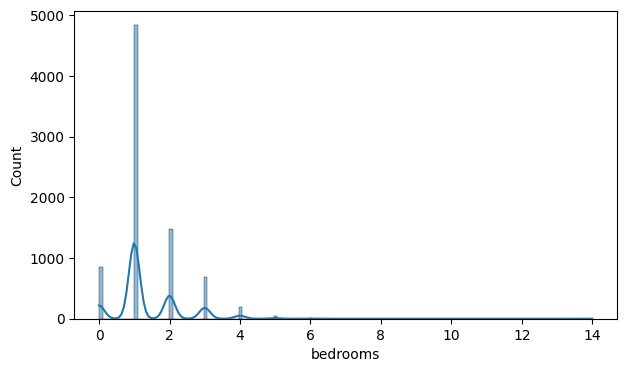

In [106]:
plt.figure(figsize = (7, 4))
sns.histplot(data = rentals, x = rentals['bedrooms'], kde = True)
plt.show()



*   Maioria das casas com 1 quarto





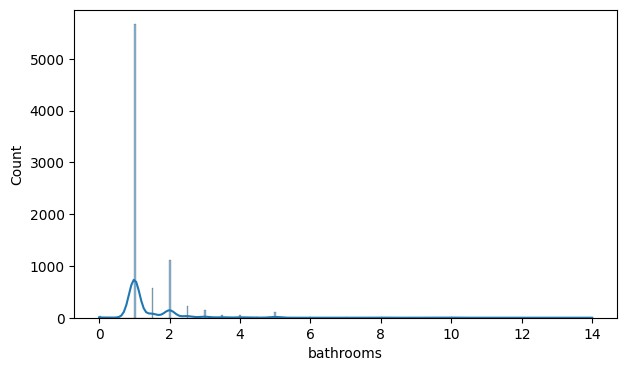

In [107]:
plt.figure(figsize = (7, 4))
sns.histplot(data = rentals, x = rentals['bathrooms'], kde = True)
plt.show()



*   Maioria das casas com 1 banheiro




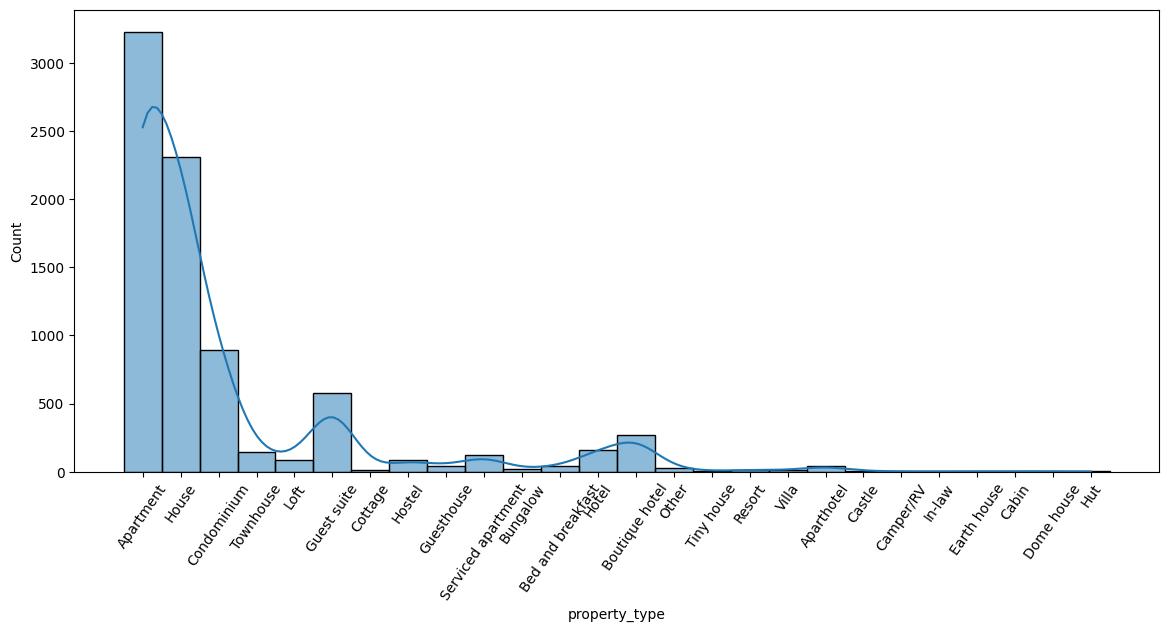

In [108]:
plt.figure(figsize = (14, 6))
sns.histplot(data = rentals, x = rentals['property_type'], kde = True)
plt.xticks(rotation=55)
plt.show()

Maioria das propiedades são do tipo Apartamento e casa

In [109]:
rentals.corr()

<ipython-input-109-b8fbe2a52e05>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rentals.corr()


,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
latitude,1.000000,0.187000,0.078469,-0.108647,-0.007415,0.083231
longitude,0.187000,1.000000,0.007627,-0.115893,0.002028,0.015867
bathrooms,0.078469,0.007627,1.000000,0.327916,-0.004766,0.081981
bedrooms,-0.108647,-0.115893,0.327916,1.000000,-0.004159,0.262343
minimum_nights,-0.007415,0.002028,-0.004766,-0.004159,1.000000,-0.004247
price,0.083231,0.015867,0.081981,0.262343,-0.004247,1.000000


<ipython-input-110-8f507fee041d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rentals.corr(), annot = True, fmt = '.2f', cmap = 'Reds', vmax = .99, vmin = -0.60)


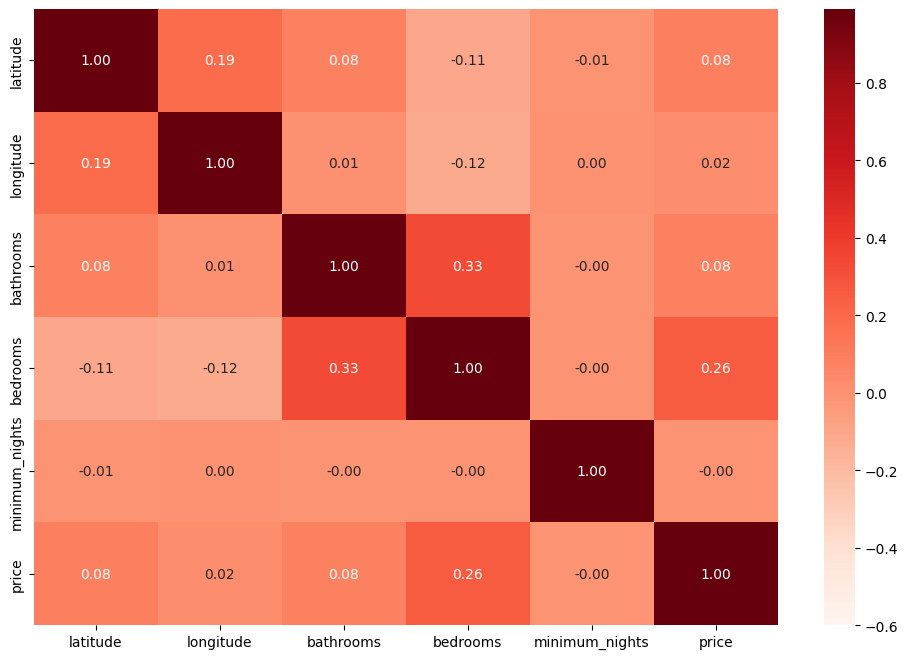

In [110]:
plt.figure(figsize = (12,8))
sns.heatmap(rentals.corr(), annot = True, fmt = '.2f', cmap = 'Reds', vmax = .99, vmin = -0.60)
plt.show()

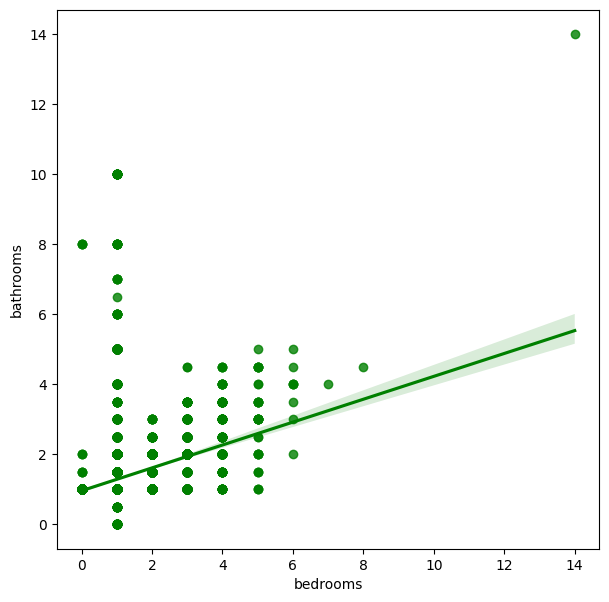

In [111]:
plt.figure(figsize = (7, 7))
sns.regplot(x = 'bedrooms', y = 'bathrooms', data = rentals, color = 'green') 
plt.show()

Quanto mais quarto mais banheiro

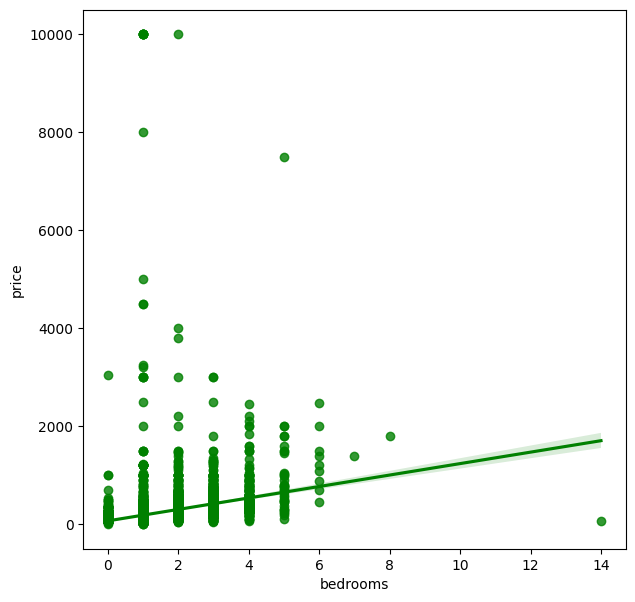

In [112]:
plt.figure(figsize = (7, 7))
sns.regplot(x = 'bedrooms', y = 'price', data = rentals, color = 'green') 
plt.show()

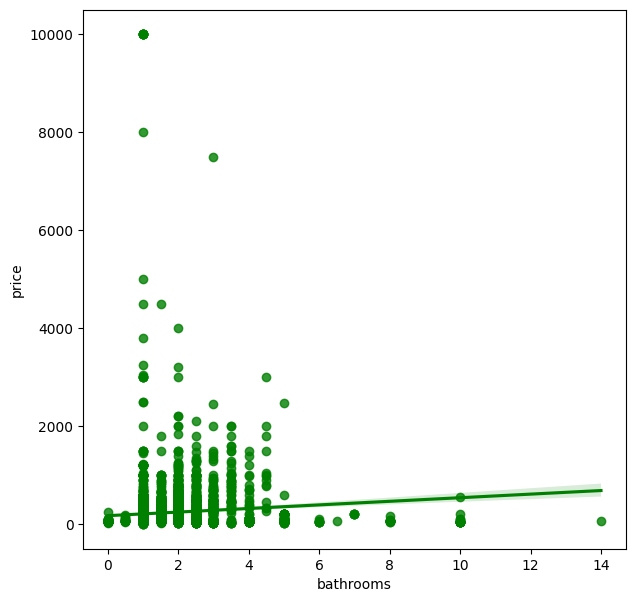

In [113]:
plt.figure(figsize = (7, 7))
sns.regplot(x = 'bathrooms', y = 'price', data = rentals, color = 'green') 
plt.show()

Mais quarto mais caro a diaria

#Removendo outliers

##Property type

In [114]:
print(rentals.property_type.value_counts())

Apartment             3234
House                 2313
Condominium            892
Guest suite            577
Boutique hotel         267
Hotel                  157
Townhouse              142
Serviced apartment     121
Loft                    88
Hostel                  86
Bed and breakfast       43
Guesthouse              41
Aparthotel              41
Other                   24
Bungalow                17
Resort                  14
Cottage                 12
Villa                   10
Castle                   4
Cabin                    3
Tiny house               3
Earth house              2
In-law                   1
Camper/RV                1
Dome house               1
Hut                      1
Name: property_type, dtype: int64


##Bedrooms


1.0     4833
2.0     1472
0.0      854
3.0      694
4.0      193
5.0       37
6.0        9
14.0       1
7.0        1
8.0        1
Name: bedrooms, dtype: int64


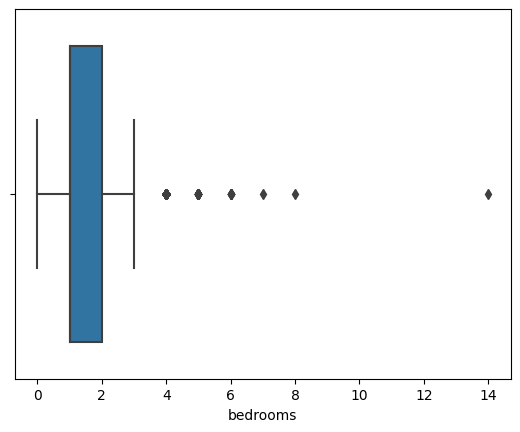

In [115]:
sns.boxplot(x=rentals['bedrooms'])
print(rentals['bedrooms'].value_counts().astype(int))

In [116]:
drop=[14,7,8]
rentals['bedrooms']=rentals['bedrooms'].astype(int)
for i in drop:
	rentals=rentals.drop(rentals[rentals.bedrooms == i].index)

##Bathrooms


1     6247
2     1345
3      211
5      113
4       73
0       55
10      19
8       14
6       10
7        5
Name: bathrooms, dtype: int64


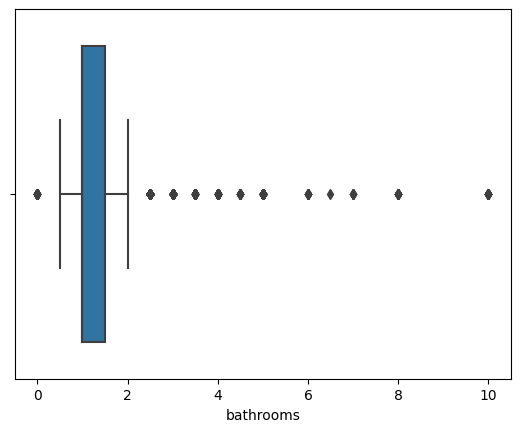

In [117]:
sns.boxplot(x=rentals['bathrooms'])
print(rentals['bathrooms'].astype(int).value_counts())

In [118]:
rentals=rentals.drop(rentals[rentals.bathrooms == 7].index)
rentals['bedrooms']=rentals['bedrooms'].astype(int)

##Minimum Nights


In [119]:
aux1=list(rentals.minimum_nights.value_counts().index)
drop_2=aux1[13:]
for i in drop_2:
	rentals=rentals.drop(rentals[rentals.minimum_nights ==i].index)
print(rentals.minimum_nights.value_counts())

30     3262
2      1552
1      1417
3       862
4       322
5       216
31      114
7        73
32       60
60       40
6        36
90       31
180      18
Name: minimum_nights, dtype: int64


##Price

In [120]:
aux2=list(rentals.price.value_counts().index)


In [121]:
drop_3=aux2[230:]
for i in drop_3:
    rentals=rentals.drop(rentals[rentals.price==i].index)

rentals.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7364 entries, 0 to 8110
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        7364 non-null   float64
 1   longitude       7364 non-null   float64
 2   property_type   7364 non-null   object 
 3   room_type       7364 non-null   object 
 4   bathrooms       7364 non-null   float64
 5   bedrooms        7364 non-null   int64  
 6   minimum_nights  7364 non-null   int64  
 7   price           7364 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 517.8+ KB


#Modelo

In [122]:

rentals_dummies=pd.get_dummies(rentals)
X=rentals_dummies.drop(columns=['price'])
y=rentals_dummies.price 



In [123]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3, random_state = 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



In [124]:
pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [137]:
from sklearn.ensemble import RandomForestRegressor


model =RandomForestRegressor()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(r2_score(y_test,y_predict)*100)

49.28105805729381


In [126]:
result={'y':y_test,'Predict':y_predict}
result_df=pd.DataFrame(result)

In [127]:

print(result_df.head(10))

          y  Predict
3730   32.0    31.37
4066   60.0   138.63
2971   90.0   122.56
3677  300.0   314.83
6065   63.0    87.54
5625  350.0   339.18
6460  100.0    99.99
1891  120.0   141.52
5612  400.0   290.53
3513  100.0   152.71


#Tentativa de melhora_1

In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criar o modelo de RandomForestRegressor
regressor = RandomForestRegressor()

# Definir a métrica de avaliação
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(regressor, param_grid, scoring=scorer, cv=5)

# Treinar o modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Obter os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Treinar o modelo final com os melhores hiperparâmetros
final_regressor = RandomForestRegressor(**best_params)
final_regressor.fit(X_train, y_train)

# Fazer previsões usando o modelo final
y_pred = final_regressor.predict(X_test)
print(r2_score(y_test,y_pred)*100)

KeyboardInterrupt: ignored

#Tentativa de melhora_2

In [128]:
import math

def convert_to_polar_coordinates(latitude, longitude):
    # Converter latitude e longitude de graus para radianos
    lat_rad = math.radians(latitude)
    lon_rad = math.radians(longitude)

    # Raio médio da Terra em quilômetros
    R = 6371

    # Converter para coordenadas retangulares
    x = R * math.cos(lat_rad) * math.cos(lon_rad)
    y = R * math.cos(lat_rad) * math.sin(lon_rad)
    z = R * math.sin(lat_rad)

    # Converter para coordenadas polares
    r = math.sqrt(x**2 + y**2 + z**2)
    theta = math.acos(z / r)
    phi = math.atan2(y, x)

    # Converter de radianos para graus
    theta_deg = math.degrees(theta)
    phi_deg = math.degrees(phi)

    return  theta_deg, phi_deg

In [129]:
rentals_test=rentals

In [130]:
rentals_test[[ 'theta', 'phi']] = rentals_test.apply(lambda row: convert_to_polar_coordinates(row['latitude'], row['longitude']), axis=1, result_type='expand')

In [131]:
rentals_dummies_test=pd.get_dummies(rentals_test)
X=rentals_dummies_test.drop(columns=['price'])
y=rentals_dummies_test.price 

print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7364 entries, 0 to 8110
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   latitude                          7364 non-null   float64
 1   longitude                         7364 non-null   float64
 2   bathrooms                         7364 non-null   float64
 3   bedrooms                          7364 non-null   int64  
 4   minimum_nights                    7364 non-null   int64  
 5   theta                             7364 non-null   float64
 6   phi                               7364 non-null   float64
 7   property_type_Aparthotel          7364 non-null   uint8  
 8   property_type_Apartment           7364 non-null   uint8  
 9   property_type_Bed and breakfast   7364 non-null   uint8  
 10  property_type_Boutique hotel      7364 non-null   uint8  
 11  property_type_Bungalow            7364 non-null   uint8  
 12  proper

In [132]:
X_train_test,X_test_test,y_train_test,y_test_test=train_test_split(X,y,test_size = 0.3, random_state = 1)
scaler = StandardScaler()
X_train_test = scaler.fit_transform(X_train_test)
X_test_test=scaler.transform(X_test_test)


In [133]:
pca = PCA(0.95)
X_train_test = pca.fit_transform(X_train_test)
X_test_test=pca.transform(X_test_test)

In [134]:
from sklearn.ensemble import RandomForestRegressor


model_test = RandomForestRegressor()

model_test.fit(X_train_test, y_train_test)
y_predict_test = model.predict(X_test_test)
print(r2_score(y_test_test,y_predict_test)*100)

-3.5518422064668487


In [135]:
result_test={'y':y_test_test,'Predict':y_predict_test}
result_df_test=pd.DataFrame(result_test)

In [136]:
print(result_df_test.head(10))

          y  Predict
3730   32.0   147.56
4066   60.0   189.37
2971   90.0   196.75
3677  300.0   180.28
6065   63.0    88.15
5625  350.0   273.20
6460  100.0   275.98
1891  120.0   187.87
5612  400.0   165.77
3513  100.0   209.44
